In [291]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [292]:
TRAIN_DATASET_PATH = '''D:\\Обучение\\GB\\Numpy, Pandas, Matplotlib I\\data\data\\train.csv'''
TEST_DATASET_PATH = '''D:\\Обучение\\GB\\Numpy, Pandas, Matplotlib I\\data\\data\\test.csv'''

In [293]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [294]:
train_df = train_df.drop('Id', axis =1 )
test_df = test_df.drop('Id', axis =1 )

In [295]:
train_df_r = train_df
#train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [296]:
def sigma_checkout(in_data, feature_name):
    for feature in feature_name:
        median = in_data[feature].median()
        std = in_data[feature].std()
        in_data.loc[ (in_data[feature] > (median + 2*std)) | (in_data[feature] < (median - 2*std)), feature ] = median

In [297]:
med = train_df_r['Healthcare_1'].median()
train_df_r.loc[train_df_r['Healthcare_1'].isnull(), 'Healthcare_1'] = med
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = med
med = train_df_r['LifeSquare'].median()
train_df_r.loc[train_df_r['LifeSquare'].isnull(), 'LifeSquare'] = med
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = med



In [298]:
# Rooms
train_df_r['Rooms'] = train_df['Rooms'].astype(int)
median = train_df.loc[(train_df['Rooms'] >= 6) | (train_df['Rooms'] == 0), 'Rooms'].median()
train_df_r.loc[ (train_df_r['Rooms'] > 6) | (train_df['Rooms'] == 0), 'Rooms'] = median
# Square
sigma_checkout(train_df_r, ['Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseYear'])

In [299]:
train_df_r.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.886600,54.108930,35.302144,5.793000,7.667700,12.609400,1985.162900,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.814498,15.115351,15.576139,4.412335,4.139322,6.775974,35.054684,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.794392,25.527399,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,64.113508,41.396901,9.000000,10.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,6.000000,94.510832,174.837082,63.000000,17.000000,117.000000,4968.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [300]:
# plt.figure(figsize=(16, 8))

# data = train_df['Square']
# plotdata = np.log2(data+1)
# fig, axs = plt.subplots(2, 2, figsize=(15,12))
# axs = axs.flatten()
# nbins = 50
# axs[0].hist(data, bins=nbins)
# axs[1].hist(plotdata, bins=nbins)
# axs[2].hist(data, bins=nbins)
# axs[2].set_yscale('log')
# axs[3].hist(plotdata, bins=nbins)
# axs[3].set_yscale('log')
# #axs[1].hist(plotdata, bins=10)

In [301]:
train_df_r['Ecology_2'].value_counts()
train_df_r['Ecology_3'].value_counts()
train_df_r['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [309]:
feat = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
# 'Ecology_2',
# 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']
# 'Shops_2']

In [310]:
x = train_df_r[feat]
y = train_df_r['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Train R2:	0.874
Test R2:	0.732


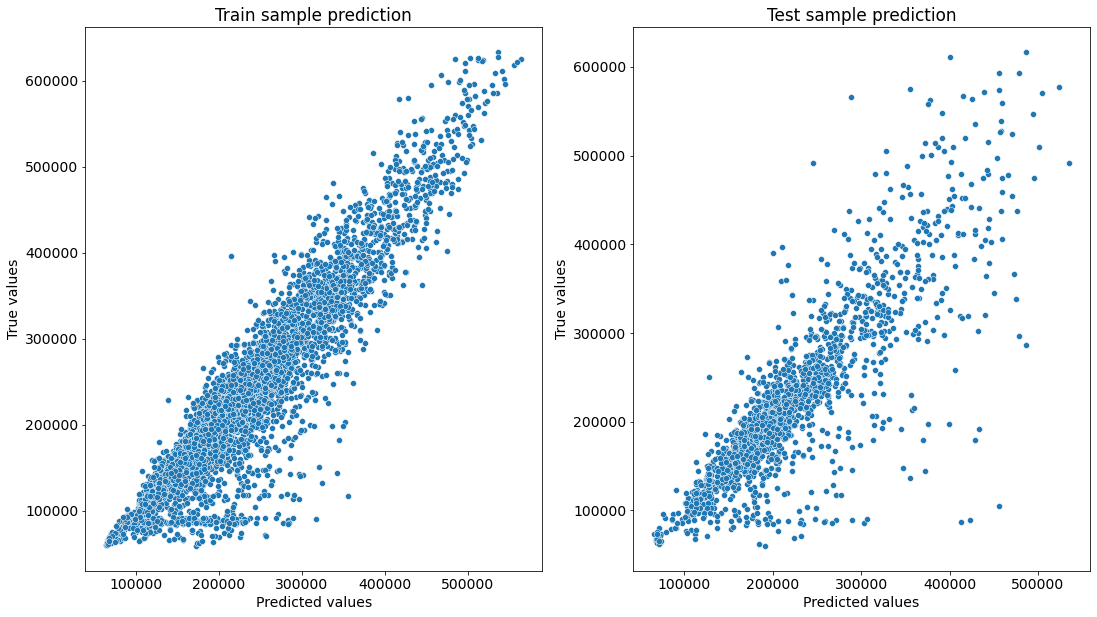

In [311]:
forest = RandomForestRegressor(n_estimators = 250, max_depth = 11)
forest.fit(x_train, y_train)
train_pred = forest.predict(x_train)
test_pred = forest.predict(x_test)
evaluate_preds(y_train, train_pred, y_test, test_pred)

In [312]:
forest.fit(x, y)

RandomForestRegressor(max_depth=11, n_estimators=250)

In [315]:
itog_test = test_df[feat]
itog_test = itog_test.fillna(0)
pred = pd.DataFrame(forest.predict(itog_test), columns=['pred'])
pred.to_csv('EAChudakov_predict.csv')